# Signals and Systems for Dummies, Chapter 3

## Continuous-time flip and shift

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
def create_rect_pulse(amp, offset, tau, t):
    """
    r = amp*pi((t-offset)/tau)

    """
    r = np.zeros_like(t)
    r[(t > offset-tau/2) & (t <= offset+tau/2)] = amp
    return r

In [3]:
step = 0.005
t = np.arange(0, 10, step)
x = create_rect_pulse(2, 3.5, 1, t)
x = create_rect_pulse(2, 3.5, 1, t)*(t-3)
h = create_rect_pulse(1, 1, 2, t)
c = signal.convolve(x, h, method="direct")*step

Text(0.5, 1.0, 'Finite Extent Signal - Convolution Example')

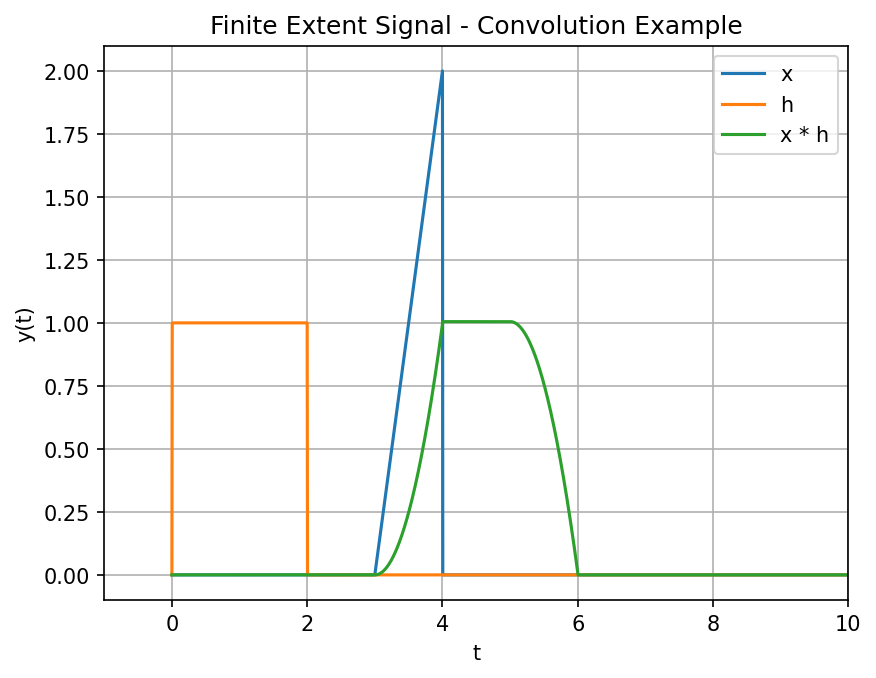

In [4]:
fig, ax = plt.subplots(dpi=150)
ax.plot(t, x, label="x")
ax.plot(t, h, label="h")
t_c = np.arange(0, step*len(c), step)
t_c = t_c[:len(c)]
ax.plot(t_c, c, label="x * h")
ax.grid()
ax.legend()
ax.set_xlim(right=10)
ax.set_ylabel("y(t)")
ax.set_xlabel("t")
ax.set_title("Finite Extent Signal - Convolution Example")

Text(0.5, 1.0, 'Signal Transformation: Shift + Reverse')

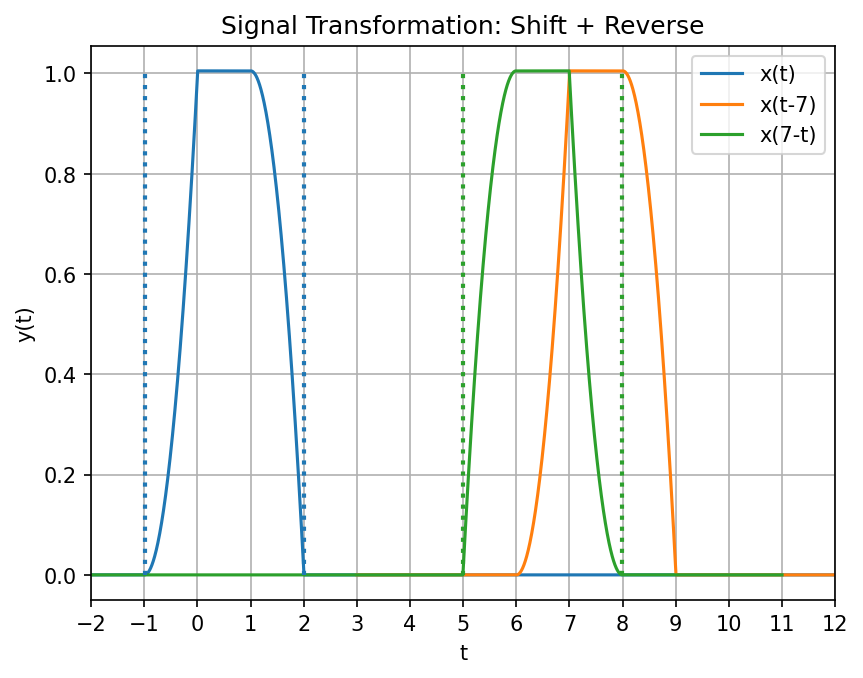

In [40]:
shift = 7

fig, ax = plt.subplots(dpi=150)
t_c = np.arange(0, step*len(c), step)
t_c = t_c[:len(c)]
t_c = t_c-4
sig_idx = np.nonzero(c > 0)[0]
ta = t_c[sig_idx.min()]
tb = t_c[sig_idx.max()]
ax.plot(t_c, c, label="x(t)")
ax.plot(t_c+shift, c, label=f"x(t-{shift})")
ax.plot(-t_c+shift, c, label=f"x({shift}-t)")


ax.grid()
ax.legend()
ax.set_xlim(left=-2, right=12)
ax.set_xticks(range(-2,13))
ax.set_ylabel("y(t)")
ax.set_xlabel("t")
colors = rcParams["axes.prop_cycle"].by_key()["color"]
ax.vlines([ta, tb], ymin=0, ymax=1, colors=colors[0], linestyles="dotted", linewidth=2)
ax.vlines([shift-ta, shift-tb], ymin=0, ymax=1, colors=colors[2], linestyles="dotted", linewidth=2)
ax.set_title("Signal Transformation: Shift + Reverse")